# Assignment 9

##  Task 1 In Exercise 1 we used Hierarchical clustering algorithm
#### Which type?
The Agglomerative Algorithm

#### How many types of hierarchical clustering are you familiar with?
We know the following:
The Agglomerative Algorithm <br>
DIvisible ANAlysis

#### How do they differ?
DIANA: creates more and more clusters by splitting the data more and more. So you start with a large cluster, then divide the data as best as possible into 2 clusters, etc. until there is the best number of clusters

AGNES: collects more and more data points until all the data points belong to one cluster 

##  Task 2 Train a clustering model with Mean Shift algorithm and freedom.csv data source file.

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import  MeanShift, estimate_bandwidth

from sklearn import metrics
import matplotlib.pyplot as plt


from scipy.spatial.distance import cdist

import seaborn as sns
import plotly.express as pxp
import plotly.graph_objs as gph

In [2]:
!pwd

/Users/jacobsimonsen/Desktop/DataScience/DataScience/Assignment 9


In [3]:
data = pd.read_csv('freedom.csv', delimiter=',')
print(data)

         country  1972  1973  1974  1975  1976  1977  1978  1979  1980  ...  \
0    Afghanistan   4.5   6.5   6.5   6.5   6.5   6.0   7.0   7.0   7.0  ...   
1        Albania   7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0  ...   
2        Algeria   6.0   6.0   6.0   6.5   6.0   6.0   6.0   6.0   6.0  ...   
3        Andorra   3.5   4.0   4.0   4.0   4.0   NaN   NaN   NaN   NaN  ...   
4         Angola   NaN   NaN   NaN   6.0   6.0   7.0   7.0   7.0   7.0  ...   
..           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
188    Venezuela   2.0   2.0   2.0   2.0   1.5   1.5   1.5   1.5   1.5  ...   
189      Vietnam   6.0   6.0   6.0   7.0   7.0   7.0   7.0   7.0   7.0  ...   
190        Yemen   5.5   6.0   6.0   6.3   6.3   6.3   6.0   6.0   6.0  ...   
191       Zambia   5.0   5.0   4.5   5.0   5.0   5.0   5.0   5.0   5.5  ...   
192     Zimbabwe   5.5   5.5   5.5   5.5   5.5   5.5   5.0   4.0   3.5  ...   

     2009  2010  2011  2012  2013  2014  2015  2016

In [4]:
data.shape

(193, 48)

In [5]:
data.head()

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,4.5,6.5,6.5,6.5,6.5,6.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.5,5.5
1,Albania,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,Algeria,6.0,6.0,6.0,6.5,6.0,6.0,6.0,6.0,6.0,...,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5
3,Andorra,3.5,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Angola,NaN,NaN,NaN,6.0,6.0,7.0,7.0,7.0,7.0,...,5.5,5.5,5.5,5.5,5.5,5.5,6.0,6.0,6.0,5.5


In [6]:
data = data.fillna(data.mean())
data

/var/folders/h4/wzw0wgv94hdggc8yh756kt480000gn/T/ipykernel_4568/1611534281.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,4.500000,6.500000,6.50000,6.5,6.5,6.000000,7.000000,7.000000,7.00000,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.5,5.5
1,Albania,7.000000,7.000000,7.00000,7.0,7.0,7.000000,7.000000,7.000000,7.00000,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,Algeria,6.000000,6.000000,6.00000,6.5,6.0,6.000000,6.000000,6.000000,6.00000,...,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5
3,Andorra,3.500000,4.000000,4.00000,4.0,4.0,4.380405,4.317881,4.227273,4.26129,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Angola,4.299296,4.318182,4.32069,6.0,6.0,7.000000,7.000000,7.000000,7.00000,...,5.5,5.5,5.5,5.5,5.5,5.5,6.0,6.0,6.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,2.000000,2.000000,2.00000,2.0,1.5,1.500000,1.500000,1.500000,1.50000,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,5.5,5.5,6.5
189,Vietnam,6.000000,6.000000,6.00000,7.0,7.0,7.000000,7.000000,7.000000,7.00000,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
190,Yemen,5.500000,6.000000,6.00000,6.3,6.3,6.300000,6.000000,6.000000,6.00000,...,5.5,5.5,6.0,6.0,6.0,6.0,6.5,6.5,6.5,6.5
191,Zambia,5.000000,5.000000,4.50000,5.0,5.0,5.000000,5.000000,5.000000,5.50000,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,4.0,4.0,4.0


In [7]:
X = data.iloc[:, 1:3].values
X

array([[4.5       , 6.5       ],
       [7.        , 7.        ],
       [6.        , 6.        ],
       [3.5       , 4.        ],
       [4.29929577, 4.31818182],
       [4.29929577, 4.31818182],
       [4.5       , 2.        ],
       [4.29929577, 4.31818182],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [4.29929577, 4.31818182],
       [4.29929577, 1.5       ],
       [5.5       , 5.5       ],
       [3.        , 4.        ],
       [1.        , 1.        ],
       [4.29929577, 4.31818182],
       [1.        , 1.        ],
       [4.29929577, 4.31818182],
       [6.        , 6.        ],
       [4.        , 4.        ],
       [4.5       , 4.5       ],
       [4.29929577, 4.31818182],
       [3.5       , 2.5       ],
       [5.        , 5.        ],
       [5.5       , 5.5       ],
       [7.        , 7.        ],
       [3.5       , 3.5       ],
       [7.        , 7.        ],
       [5.5       , 5.5       ],
       [5.        , 5.        ],
       [1.

In [8]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=200)

In [9]:
msmodel = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msmodel.fit(X)
labels = msmodel.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
n_clusters_

9

In [10]:
cluster_centers = msmodel.cluster_centers_
cluster_centers

array([[4.37630129, 4.41897233],
       [5.9673913 , 5.95652174],
       [5.27586207, 5.29310345],
       [6.72916667, 6.75      ],
       [2.36956522, 2.36956522],
       [1.15909091, 1.13636364],
       [3.5       , 3.57692308],
       [4.39964789, 1.75      ],
       [1.5       , 6.        ]])

In [11]:
X

array([[4.5       , 6.5       ],
       [7.        , 7.        ],
       [6.        , 6.        ],
       [3.5       , 4.        ],
       [4.29929577, 4.31818182],
       [4.29929577, 4.31818182],
       [4.5       , 2.        ],
       [4.29929577, 4.31818182],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [4.29929577, 4.31818182],
       [4.29929577, 1.5       ],
       [5.5       , 5.5       ],
       [3.        , 4.        ],
       [1.        , 1.        ],
       [4.29929577, 4.31818182],
       [1.        , 1.        ],
       [4.29929577, 4.31818182],
       [6.        , 6.        ],
       [4.        , 4.        ],
       [4.5       , 4.5       ],
       [4.29929577, 4.31818182],
       [3.5       , 2.5       ],
       [5.        , 5.        ],
       [5.5       , 5.5       ],
       [7.        , 7.        ],
       [3.5       , 3.5       ],
       [7.        , 7.        ],
       [5.5       , 5.5       ],
       [5.        , 5.        ],
       [1.

In [12]:
Y = msmodel.predict(X)
Y

array([2, 3, 1, 6, 0, 0, 7, 0, 5, 5, 0, 7, 2, 6, 5, 0, 5, 0, 1, 0, 0, 0,
       6, 2, 2, 3, 6, 3, 2, 2, 5, 0, 3, 3, 8, 3, 4, 0, 3, 1, 5, 1, 0, 3,
       4, 0, 5, 0, 0, 4, 2, 1, 4, 1, 0, 0, 0, 2, 4, 4, 5, 1, 4, 0, 0, 1,
       1, 0, 4, 3, 0, 4, 1, 0, 1, 5, 4, 2, 2, 3, 5, 4, 5, 5, 5, 1, 0, 0,
       0, 6, 0, 2, 0, 4, 0, 1, 3, 6, 0, 5, 0, 3, 4, 4, 3, 5, 0, 1, 4, 6,
       0, 0, 6, 3, 0, 0, 0, 1, 2, 4, 2, 5, 5, 0, 1, 2, 3, 0, 5, 3, 0, 0,
       3, 0, 2, 1, 2, 1, 2, 2, 3, 0, 3, 6, 4, 0, 1, 1, 0, 0, 2, 2, 0, 0,
       0, 3, 0, 2, 0, 2, 4, 0, 0, 0, 1, 0, 5, 5, 3, 0, 1, 2, 0, 1, 6, 4,
       2, 6, 0, 0, 3, 0, 1, 5, 5, 0, 0, 0, 4, 1, 1, 2, 2])

In [13]:
len(msmodel.labels_)

193

In [14]:
P = msmodel.predict(X)
P

array([2, 3, 1, 6, 0, 0, 7, 0, 5, 5, 0, 7, 2, 6, 5, 0, 5, 0, 1, 0, 0, 0,
       6, 2, 2, 3, 6, 3, 2, 2, 5, 0, 3, 3, 8, 3, 4, 0, 3, 1, 5, 1, 0, 3,
       4, 0, 5, 0, 0, 4, 2, 1, 4, 1, 0, 0, 0, 2, 4, 4, 5, 1, 4, 0, 0, 1,
       1, 0, 4, 3, 0, 4, 1, 0, 1, 5, 4, 2, 2, 3, 5, 4, 5, 5, 5, 1, 0, 0,
       0, 6, 0, 2, 0, 4, 0, 1, 3, 6, 0, 5, 0, 3, 4, 4, 3, 5, 0, 1, 4, 6,
       0, 0, 6, 3, 0, 0, 0, 1, 2, 4, 2, 5, 5, 0, 1, 2, 3, 0, 5, 3, 0, 0,
       3, 0, 2, 1, 2, 1, 2, 2, 3, 0, 3, 6, 4, 0, 1, 1, 0, 0, 2, 2, 0, 0,
       0, 3, 0, 2, 0, 2, 4, 0, 0, 0, 1, 0, 5, 5, 3, 0, 1, 2, 0, 1, 6, 4,
       2, 6, 0, 0, 3, 0, 1, 5, 5, 0, 0, 0, 4, 1, 1, 2, 2])

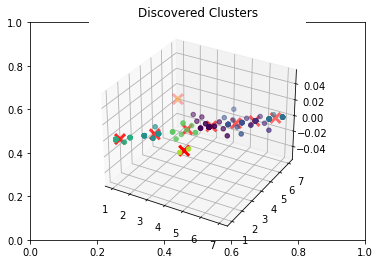

In [15]:
fig = plt.figure()
plt.title('Discovered Clusters')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],  marker='o', cmap='viridis', c=labels)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', 
           color='red', s=100, linewidth=3, zorder=10)
plt.show()

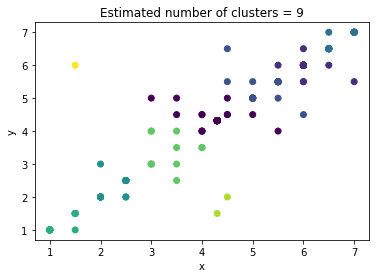

In [16]:
plt.scatter(X[:,0], X[:,1], c=labels, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
!pip install joblib

In [18]:
import joblib
joblib.dump(msmodel, 'msmodel.pkl')

['msmodel.pkl']

## Store model

In [19]:
msmodel = joblib.load('msmodel.pkl')

In [20]:
my_prediction = msmodel.predict([[137,  83]])
my_prediction

array([3])

In [21]:
!pip install flask-bootstrap

In [22]:
!pip install wtforms

In [23]:
%%writefile mswebapp.py

# Import libraries
import numpy as np

# from sklearn.externals 
import joblib
import pickle
from flask import Flask, request, jsonify, render_template

# create an instance (our app)
#app = Flask(__name__)
app = Flask(__name__, template_folder='templates')

msmodel = joblib.load('msmodel.pkl')

@app.route('/', methods=['GET', 'POST'])

@app.route('/hi/<name>')
def hello(name = None):
    return render_template('start.html', name=name)
# name is parameter in the template: {{name}}

@app.route('/predict')
def predict():
    return render_template('prediction.html')

@app.route('/predicted', methods=['GET', 'POST'])
def predicted():
    if request.method == 'POST':
        x1 = request.form['x1']
        x2 = request.form['x2']
        X = [[x1, x2]]
        predicted = msmodel.predict(X)
          
        return render_template("predicted.html", content=X, prediction=predicted)
    
@app.route('/bye')
def bye():
    return render_template('bye.html')

if __name__ == '__main__':
    app.run(debug=True)

Overwriting mswebapp.py


In [ ]:
!python mswebapp.py

 * Serving Flask app "mswebapp" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with watchdog (fsevents)
 * Debugger is active!
 * Debugger PIN: 111-947-483
127.0.0.1 - - [08/May/2022 13:22:28] "GET /predict?submit=make+another+prediction HTTP/1.1" 200 -
/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
127.0.0.1 - - [08/May/2022 13:22:40] "POST /predicted HTTP/1.1" 200 -
127.0.0.1 - - [08/May/2022 13:22:54] "GET /bye?submit=----+say+good+bye+---- HTTP/1.1" 200 -


In [ ]:
__init__.py

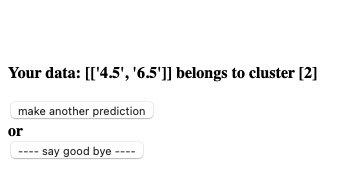

regarding to X can we see that the first point 4.5 and 6.5 which is equal to predict y first point in the array which is 2. that refers to the cluster number. This is proven by the screenshot above from the webapp.

##  Task 3 Describe the difference between K-means and Mean Shift algorithms

Meanshift takes a point in a scataplot, and looks at the points within a radius of the startpoint. then it take the distence between other points and the start point and calculates the mean of the distance. then it moves on to a other point with the same value of the mean. and does the same until the mean distance is the same on every single point.

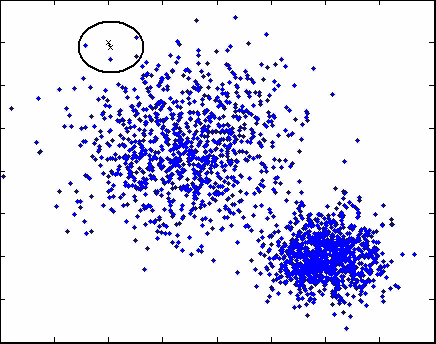

K-menas looks at the distance between the points and connect the point with the smallest distance.

### In which occasions would you prefer to use the mean shift algorithm?
if we have a large dataset we will use k-means because it is a lot faster to calculate how many clusters there will be needed <br>

we will use meanshift if the dataset is because it is very performance heavy when it need to calculate a lot more